**Mount the google drive in order to access the dataset**

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Import all the libraries that will be required for the project**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

**Copy the file path of the dataset and read the csv file as a dataframe**

In [6]:
file_path = ('/content/drive/MyDrive/car_price_dataset.csv')

df = pd.read_csv(file_path)

**Dataframe Analysis**

In [51]:
df.head(3)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


**Data Visualization**

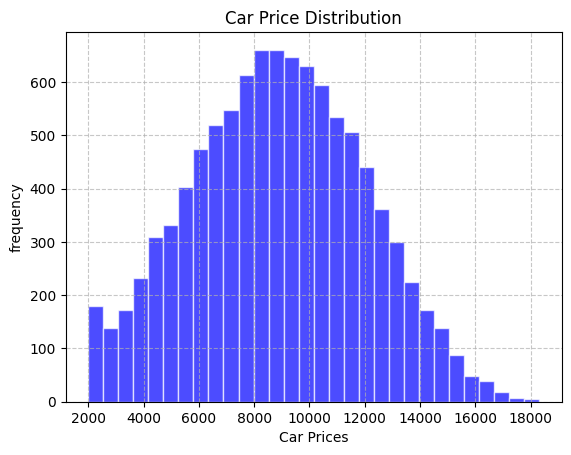

In [8]:
plt.hist(df['Price'], bins = 30, edgecolor = 'white', color = 'blue', alpha = 0.7)
plt.xlabel('Car Prices')
plt.ylabel('frequency')
plt.title('Car Price Distribution')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

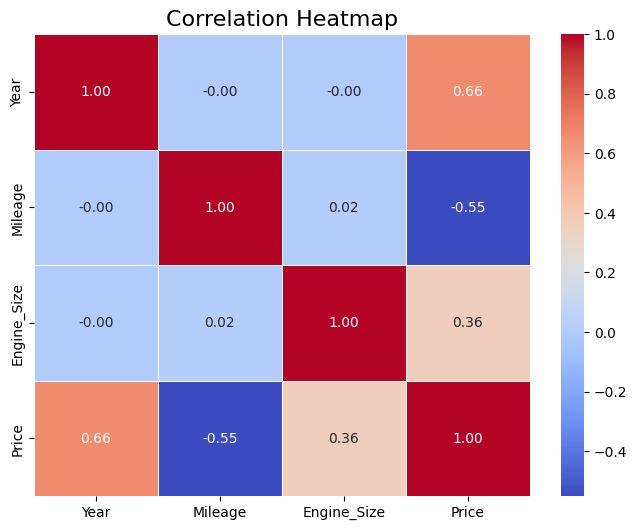

In [9]:
plt.figure(figsize=(8, 6))
correlation = df[['Year', 'Mileage', 'Engine_Size', 'Price']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


**Feature Engineering**

In [10]:
current_year = 2025
df['Car_Age'] = current_year - df['Year']

# Drop the 'Year' column since we no longer need it
df = df.drop(columns=['Year'])


**Encoding Categorical Features**

In [11]:
df = pd.get_dummies(df, columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Engine_Size                  10000 non-null  float64
 1   Mileage                      10000 non-null  int64  
 2   Doors                        10000 non-null  int64  
 3   Owner_Count                  10000 non-null  int64  
 4   Price                        10000 non-null  int64  
 5   Car_Age                      10000 non-null  int64  
 6   Brand_Audi                   10000 non-null  bool   
 7   Brand_BMW                    10000 non-null  bool   
 8   Brand_Chevrolet              10000 non-null  bool   
 9   Brand_Ford                   10000 non-null  bool   
 10  Brand_Honda                  10000 non-null  bool   
 11  Brand_Hyundai                10000 non-null  bool   
 12  Brand_Kia                    10000 non-null  bool   
 13  Brand_Mercedes   

In [13]:
# Convert True/False to 1/0 for specific columns
boolean_columns = df.select_dtypes(include=['bool']).columns

# Convert boolean values (True/False) to integers (1/0)
df[boolean_columns] = df[boolean_columns].astype(int)


**Normalization**

In [14]:
numerical_columns = ['Car_Age', 'Mileage', 'Engine_Size']

scaler = MinMaxScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [15]:
df

,Engine_Size,Mileage,Doors,Owner_Count,Price,Car_Age,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,0.800,0.966648,3,5,8501,0.130435,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.250,0.017775,2,3,12092,0.478261,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,0.800,0.771584,4,2,11171,0.130435,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0.250,0.536626,2,1,11780,0.000000,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.400,0.955558,3,3,2867,0.869565,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.675,0.019235,2,4,8884,0.826087,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9996,0.100,0.560062,2,1,6240,0.913043,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9997,0.500,0.288872,5,1,9866,0.565217,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
9998,0.100,0.752686,4,1,4084,0.913043,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


**Data Splitting into features and training a Random Forest Regressor**

In [20]:
X = df.drop(columns = ['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Make predictions**

In [21]:
y_pred = model.predict(X_test)

**Model Evaluation**

In [25]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 261.00782499999997
R-squared (R2): 0.9877867251308052


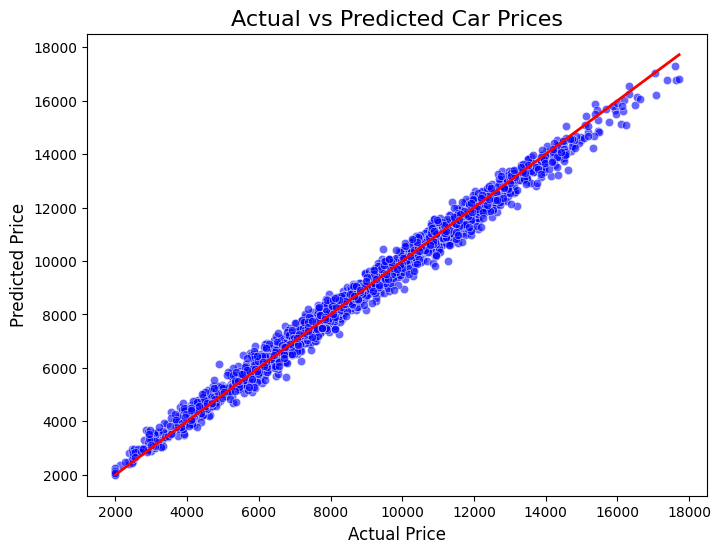

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Car Prices", fontsize=16)
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.show()

**Car Prediction Project - Summary**

The goal of this project was to build a machine learning model to predict car prices based on key features such as mileage, engine size, car age, and categorical attributes like brand and transmission type. The dataset was preprocessed, analyzed, and used to train a regression model to estimate car prices accurately.

To ensure the model performed optimally, the dataset underwent several preprocessing steps:
1. Missing value handling
2. Feature Engineering
3. Encoding categorical features
4. Normaization

Several regression models were tested, and the best performance was achieved using a Random Forest Regressor.

The model was evaluated using Mean Absolute Error (MAE) and R² Score. Low MAE (261.01) indicates minimal prediction error, meaning the model is highly accurate. High R² (0.9878) suggests that 98.78% of the variation in car prices is explained by the model’s features.

The model generalizes well and can be deployed for real-world car price estimation.